# REDES NEURONALES

---



## Introducción



En esta actividad vamos a utilizar una red neuronal para clasificar imágenes de prendas de ropa. Para ello, utilizaremos Keras con TensorFlow.

El dataset a utilizar es Fashion MNIST, un problema sencillo con imágenes pequeñas de ropa, pero más interesante que el dataset de MNIST. Puedes consultar más información sobre el dataset en [este enlace](https://github.com/zalandoresearch/fashion-mnist).

El código utilizado para contestar tiene que quedar claramente reflejado en el Notebook. Puedes crear nuevas celdas si así lo deseas para estructurar tu código y sus salidas. A la hora de entregar el notebook, **asegúrate de que los resultados de ejecutar tu código han quedado guardados**. Por ejemplo, a la hora de entrenar una red neuronal tiene que verse claramente un log de los resultados de cada epoch.

In [1]:
import keras
from keras.datasets import fashion_mnist
from keras.models import Sequential
from keras.layers import Dense
import tensorflow as tf

import matplotlib.pyplot as plt

En primer lugar vamos a importar el dataset Fashion MNIST (recordad que este es uno de los dataset de entranamiento que estan guardados en keras) que es el que vamos a utilizar en esta actividad:

In [2]:
mnist = tf.keras.datasets.fashion_mnist

Llamar a **load_data** en este dataset nos dará dos conjuntos de dos listas, estos serán los valores de entrenamiento y prueba para los gráficos que contienen las prendas de vestir y sus etiquetas.

Nota: Aunque en esta actividad lo veis de esta forma, también lo vais a poder encontrar como 4 variables de esta forma: training_images, training_labels, test_images, test_labels = mnist.load_data()

In [3]:
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()

Antes de continuar vamos a dar un vistazo a nuestro dataset, para ello vamos a ver una imagen de entrenamiento y su etiqueta o clase.

9
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0   0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62  54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134 144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178 107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216 216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   1   0 200 232 232 233 229 223 

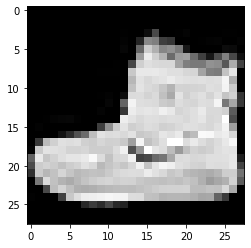

In [4]:
import numpy as np
np.set_printoptions(linewidth=200)
import matplotlib.pyplot as plt
plt.imshow(training_images[0], cmap="gray") # recordad que siempre es preferible trabajar en blanco y negro
#
print(training_labels[0])
print(training_images[0])

Habréis notado que todos los valores numericos están entre 0 y 255. Si estamos entrenando una red neuronal, una buena practica es transformar todos los valores entre 0 y 1, un proceso llamado "normalización" y afortunadamente en Python es fácil normalizar una lista. Lo puedes hacer de esta manera:

In [5]:
training_images  = training_images / 255.0
test_images = test_images / 255.0

## 1. Información sobre el dataset

Una vez tenemos los datos cargados en memoria, vamos a obtener información sobre los mismos.

**Pregunta 1.1 *(0.25 puntos)*** ¿Cuántas imágenes hay de *training* y de *test*? ¿Qué tamaño tienen las imágenes?

In [6]:
### Tu código aquí ###
print(training_images.shape)
print(test_images.shape)


(60000, 28, 28)
(10000, 28, 28)


*Tu respuesta aquí*

Tenemos 60.000 imágenes de entrenamiento y 10.000 de test
El tamaño de las imágenes en ambos casos es de 28x28

**Pregunta 1.2 *(0.25 puntos)*** Realizar una exploración de las variables que contienen los datos. Describir en qué consiste un example del dataset (qué información se guarda en cada imagen) y describir qué contiene la información en y.

In [7]:
### Tu código aquí ###
import matplotlib.pyplot as plt

print("Valor mínimo de los píxeles:", np.min(training_images))
print("Valor máximo de los píxeles:", np.max(training_images))
print("Valor promedio de los píxeles:", np.mean(training_images))
print("Desviación estándar de los píxeles:", np.std(training_images))

# Verificar el número de clases en el conjunto de entrenamiento
num_classes = len(np.unique(training_labels))
print("Número de clases en el conjunto de entrenamiento:", num_classes)


Valor mínimo de los píxeles: 0.0
Valor máximo de los píxeles: 1.0
Valor promedio de los píxeles: 0.2860405969887955
Desviación estándar de los píxeles: 0.35302424451492237
Número de clases en el conjunto de entrenamiento: 10


*Tu respuesta aquí*
Cada fila tienen una imagen de 28x28 píxeles.
Como hemos normalizado los datos, los pixeles contienen valores entre 0 y 1.
La variable y contiene el número de clase de cada imagen.


## 2. Creación del Modelo

Ahora vamos a definir el modelo, pero antes vamos a repasar algunos comandos y conceptos muy útiles:
* **Sequential**: Eso define una SECUENCIA de capas en la red neuronal
* **Dense**: Añade una capa de neuronas
* **Flatten**: ¿Recuerdas cómo eran las imágenes cuando las imprimiste para poder verlas? Un cuadrado, Flatten toma ese cuadrado y lo convierte en un vector de una dimensión.

Cada capa de neuronas necesita una función de activación. Normalmente se usa la función relu en las capas intermedias y softmax en la ultima capa (en problemas de clasificación de más de dos items)
* **Relu** significa que "Si X>0 devuelve X, si no, devuelve 0", así que lo que hace es pasar sólo valores 0 o mayores a la siguiente capa de la red.
* **Softmax** toma un conjunto de valores, y escoge el más grande.

 **Pregunta 2.1 (2 puntos)**. Utilizando Keras, y preparando los datos de X e y como fuera necesario, define y entrena una red neuronal que sea capaz de clasificar imágenes de Fashion MNIST con las siguientes características:

* Una hidden layer de tamaños 128, utilizando unidades sigmoid
Optimizador Adam.
* Durante el entrenamiento, la red tiene que mostrar resultados de loss y accuracy por cada epoch.
* La red debe entrenar durante 10 epochs y batch size de 64.
* La última capa debe de ser una capa softmax.
* Tu red tendría que ser capaz de superar fácilmente 80% de accuracy.

In [13]:
### Tu código para la red neuronal de la pregunta 2 aquí ###

import tensorflow as tf
print(tf.__version__)

mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels) ,  (test_images, test_labels) = mnist.load_data()

training_images  = training_images / 255.0
test_images = test_images / 255.0

model = Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='sigmoid'),
    keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(training_images, training_labels, epochs=10, batch_size=64)

2.11.1
Epoch 1/10
938/938 [==============================] - 4s 3ms/step - loss: 0.6031 - accuracy: 0.8015
Epoch 2/10
938/938 [==============================] - 2s 3ms/step - loss: 0.4115 - accuracy: 0.8535
Epoch 3/10
938/938 [==============================] - 3s 3ms/step - loss: 0.3744 - accuracy: 0.8662
Epoch 4/10
938/938 [==============================] - 2s 2ms/step - loss: 0.3477 - accuracy: 0.8755
Epoch 5/10
938/938 [==============================] - 2s 2ms/step - loss: 0.3294 - accuracy: 0.8804
Epoch 6/10
938/938 [==============================] - 2s 2ms/step - loss: 0.3159 - accuracy: 0.8858
Epoch 7/10
938/938 [==============================] - 2s 2ms/step - loss: 0.3026 - accuracy: 0.8903
Epoch 8/10
938/938 [==============================] - 3s 3ms/step - loss: 0.2920 - accuracy: 0.8924
Epoch 9/10
938/938 [==============================] - 3s 3ms/step - loss: 0.2821 - accuracy: 0.8960
Epoch 10/10
938/938 [==============================] - 2s 2ms/step - loss: 0.2723 - accuracy:

Para concluir el entrenamiento de la red neuronal, una buena práctica es evaluar el modelo para ver si la precisión de entrenamiento es real

**pregunta 2.2 (0.5 puntos)**: Evalúa el modelo con las imágenes y etiquetas test.

In [14]:
### Tu código para la evaluación de la red neuronal de la pregunta 2 aquí ###
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Test accuracy:', test_acc)


313/313 [==============================] - 1s 2ms/step - loss: 0.3398 - accuracy: 0.8758
Test accuracy: 0.8758000135421753



## 3: Funcionamiento de las predicción de la red neuronal



Ahora vamos a explorar el código con una serie de ejercicios para alcanzar un grado de comprensión mayor sobre las redes neuronales y su entrenamiento.

Sigue los siguientes pasos: 

* Crea una variable llamada **classifications** para construir un clasificador con las imágenes de prueba, para ello puedes utilizar la función predict sobre el conjunto de test
* Imprime con la función print la primera entrada en las clasificaciones. 

**pregunta 3.1 (0.25 puntos)**, el resultado al imprimirlo es un vector de números, 
* ¿Por qué crees que ocurre esto? ¿Qué representa este vector de números?

**pregunta 3.2 (0.25 puntos)**
* ¿Cúal es la clase de la primera entrada de la variable **classifications**? La respuesta puede ser un número o su etiqueta/clase equivalente.

In [15]:
### Tu código del clasificador de la pregunta 3 aquí ###
classifications = model.predict(test_images)
print(classifications[0])
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]
print(class_names[np.argmax(classifications[0])])

313/313 [==============================] - 0s 1ms/step
[1.50937558e-05 1.26983196e-07 7.81150266e-06 4.36550954e-06 3.09566458e-05 4.60885130e-02 1.17068164e-04 4.28916290e-02 3.22573964e-04 9.10521865e-01]
Ankle boot


Tu respuesta a la pregunta 3.1 aquí:

Como estamos construyendo un clasificador, el resultado es un vector de números que representan la probabilidad de que la imagen pertenezca a cada una de las clases.


Tu respuesta a la pregunta 3.2 aquí:

En este caso en concreto, la primera imagen tiene una probabilidad del 92% de pertenecer a la clase 9 (ankle boot).

## 4: Impacto variar el número de neuronas en las capas ocultas





En este ejercicio vamos a experimentar con nuestra red neuronal cambiando el numero de neuronas por 512 y por 1024. Para ello, utiliza la red neuronal de la pregunta 1, y en su capa oculta cambia las 128 neuronas por:

* **512 neuronas en la capa oculta
* **1024 neuronas en la capa oculta

Entrena la red en ambos casos.

In [16]:
### Tu código para 512 neuronas aquí ###

import tensorflow as tf
print(tf.__version__)

mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels) ,  (test_images, test_labels) = mnist.load_data()
training_images  = training_images / 255.0
test_images = test_images / 255.0

model = Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(512, activation='sigmoid'),
    keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(training_images, training_labels, epochs=10, batch_size=64)
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Test accuracy:', test_acc)

2.11.1
Epoch 1/10
938/938 [==============================] - 6s 5ms/step - loss: 0.5337 - accuracy: 0.8121
Epoch 2/10
938/938 [==============================] - 4s 5ms/step - loss: 0.4009 - accuracy: 0.8559
Epoch 3/10
938/938 [==============================] - 6s 6ms/step - loss: 0.3658 - accuracy: 0.8667
Epoch 4/10
938/938 [==============================] - 5s 6ms/step - loss: 0.3380 - accuracy: 0.8762
Epoch 5/10
938/938 [==============================] - 5s 5ms/step - loss: 0.3177 - accuracy: 0.8827
Epoch 6/10
938/938 [==============================] - 4s 4ms/step - loss: 0.2990 - accuracy: 0.8905
Epoch 7/10
938/938 [==============================] - 5s 5ms/step - loss: 0.2820 - accuracy: 0.8949
Epoch 8/10
938/938 [==============================] - 4s 4ms/step - loss: 0.2681 - accuracy: 0.9010
Epoch 9/10
938/938 [==============================] - 4s 4ms/step - loss: 0.2575 - accuracy: 0.9042
Epoch 10/10
313/313 [==============================] - 1s 1ms/step - loss: 0.3315 - accuracy:

In [17]:
### Tu código para 1024 neuronas aquí ###

import tensorflow as tf
print(tf.__version__)

mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels) ,  (test_images, test_labels) = mnist.load_data()
training_images  = training_images / 255.0
test_images = test_images / 255.0

model = Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(1024, activation='sigmoid'),
    keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(training_images, training_labels, epochs=10, batch_size=64)
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Test accuracy:', test_acc)

2.11.1
Epoch 1/10
938/938 [==============================] - 7s 7ms/step - loss: 0.5220 - accuracy: 0.8134
Epoch 2/10
938/938 [==============================] - 7s 7ms/step - loss: 0.4012 - accuracy: 0.8559
Epoch 3/10
938/938 [==============================] - 7s 8ms/step - loss: 0.3616 - accuracy: 0.8691
Epoch 4/10
938/938 [==============================] - 9s 9ms/step - loss: 0.3375 - accuracy: 0.8773
Epoch 5/10
938/938 [==============================] - 7s 8ms/step - loss: 0.3145 - accuracy: 0.8839
Epoch 6/10
938/938 [==============================] - 7s 7ms/step - loss: 0.2924 - accuracy: 0.8927
Epoch 7/10
938/938 [==============================] - 8s 8ms/step - loss: 0.2795 - accuracy: 0.8956
Epoch 8/10
938/938 [==============================] - 7s 8ms/step - loss: 0.2643 - accuracy: 0.9010
Epoch 9/10
938/938 [==============================] - 7s 7ms/step - loss: 0.2496 - accuracy: 0.9061
Epoch 10/10
313/313 [==============================] - 1s 2ms/step - loss: 0.3455 - accuracy:

**pregunta 4.1 (0.5 puntos)**: ¿Cuál es el impacto que tiene la red neuronal? 

#Tu respuesta a la pregunta 4.1 aquí:
El entrenamiento tarda mucho mas. Cuantas mas neuronas metemos en las hidden layers, mas tarda el
entrenamiento
En cuanto a los resultados:
Entrenamiento 128--> loss: 0.2719 - accuracy: 0.9007
Test 128         --> loss: 0.3345 - accuracy: 0.8786
Entrenamiento 512--> loss: 0.2456 - accuracy: 0.9081
Test 512         --> loss: 0.3245 - accuracy: 0.8825
Entrenamiento1024--> loss: 0.2384 - accuracy: 0.9105
Test 1024        --> loss: 0.3427 - accuracy: 0.8792

Podemos ver que el accuracy mejora (poco, pero mejora) en entrenamiento, pero al ver los datos de test, vemos que con 512 si mejora un poco, pero con 1024 baja con respecto al resultado con 512 neuronas. Esto es debido a que estamos haciendo overfitting, es decir, estamos entrenando demasiado la red y no estamos generalizando bien.

Si ahora entrenais el modelo de esta forma (con 512 y 1024 neuronas en la capa oculta) y volveis a ejecutar el predictor guardado en la variable **classifications**, escribir el código del clasificador del ejercicio 1 de nuevo e imprimid el primer objeto guardado en la variable classifications.

**pregunta 4.2 (0.25 puntos)**: 

* ¿En qué clase está clasificado ahora la primera prenda de vestir de la variable classifications?

**pregunta 4.3 (0.25 puntos)**: 

* ¿Por qué crees que ha ocurrido esto?

In [18]:
### Tu código del clasificador de la pregunta 4 aquí ###

import tensorflow as tf
print(tf.__version__)

mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels) ,  (test_images, test_labels) = mnist.load_data()
training_images  = training_images / 255.0
test_images = test_images / 255.0

model = Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(512, activation='sigmoid'),
    keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(training_images, training_labels, epochs=10, batch_size=64)
test_loss, test_acc = model.evaluate(test_images, test_labels)
classifications = model.predict(test_images)
print("con 512 predice: " + class_names[np.argmax(classifications[0])])

2.11.1
Epoch 1/10
938/938 [==============================] - 6s 5ms/step - loss: 0.5343 - accuracy: 0.8117
Epoch 2/10
938/938 [==============================] - 5s 5ms/step - loss: 0.4013 - accuracy: 0.8558
Epoch 3/10
938/938 [==============================] - 6s 7ms/step - loss: 0.3642 - accuracy: 0.8686
Epoch 4/10
938/938 [==============================] - 6s 6ms/step - loss: 0.3375 - accuracy: 0.8771
Epoch 5/10
938/938 [==============================] - 4s 5ms/step - loss: 0.3163 - accuracy: 0.8845
Epoch 6/10
938/938 [==============================] - 4s 4ms/step - loss: 0.2990 - accuracy: 0.8903
Epoch 7/10
938/938 [==============================] - 4s 4ms/step - loss: 0.2842 - accuracy: 0.8960
Epoch 8/10
938/938 [==============================] - 4s 4ms/step - loss: 0.2704 - accuracy: 0.8994
Epoch 9/10
938/938 [==============================] - 4s 4ms/step - loss: 0.2567 - accuracy: 0.9055
Epoch 10/10
313/313 [==============================] - 1s 2ms/step
con 512 predice: Ankle boo

In [19]:

import tensorflow as tf
print(tf.__version__)

mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels) ,  (test_images, test_labels) = mnist.load_data()
training_images  = training_images / 255.0
test_images = test_images / 255.0

model = Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(1024, activation='sigmoid'),
    keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(training_images, training_labels, epochs=10, batch_size=64)
test_loss, test_acc = model.evaluate(test_images, test_labels)
classifications = model.predict(test_images)
print("con 1024 predice: " + class_names[np.argmax(classifications[0])])

2.11.1
Epoch 1/10
938/938 [==============================] - 8s 8ms/step - loss: 0.5235 - accuracy: 0.8134
Epoch 2/10
938/938 [==============================] - 7s 7ms/step - loss: 0.4030 - accuracy: 0.8548
Epoch 3/10
938/938 [==============================] - 7s 7ms/step - loss: 0.3627 - accuracy: 0.8690
Epoch 4/10
938/938 [==============================] - 7s 7ms/step - loss: 0.3344 - accuracy: 0.8782
Epoch 5/10
938/938 [==============================] - 7s 8ms/step - loss: 0.3121 - accuracy: 0.8853
Epoch 6/10
938/938 [==============================] - 7s 7ms/step - loss: 0.2956 - accuracy: 0.8905
Epoch 7/10
938/938 [==============================] - 6s 7ms/step - loss: 0.2785 - accuracy: 0.8974
Epoch 8/10
938/938 [==============================] - 7s 8ms/step - loss: 0.2629 - accuracy: 0.9023
Epoch 9/10
938/938 [==============================] - 8s 9ms/step - loss: 0.2500 - accuracy: 0.9071
Epoch 10/10
313/313 [==============================] - 1s 3ms/step
con 1024 predice: Ankle bo

Tu respuesta a la pregunta 4.2 aquí:

Se sigue clasificando ankle boot en ambos casos.

Tu respuesta a la pregunta 4.3 aquí:

Pues creo que es así porque realmente es una bota, y lo está prediciendo bien en todos los casos, con un poco mas de precisión en un modelo que en otro, pero en ambos casos el resultado es el mismo.

## 5: Capa Flatten




En este ejercicio vamos a ver que ocurre cuando quitamos la capa flatten, para ello, escribe la red neuronal de la pregunta 1 y no pongas la capa Flatten.

**pregunta 5 (0.5 puntos):** ¿Puedes explicar a qué se debe el error que da?

In [20]:
### Tu código de la red neuronal sin capa flatten de la pregunta 6 aquí ###

import tensorflow as tf
print(tf.__version__)

mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels) ,  (test_images, test_labels) = mnist.load_data()
training_images  = training_images / 255.0
test_images = test_images / 255.0

model = Sequential([
    keras.layers.Dense(128, activation='sigmoid'),
    keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(training_images, training_labels, epochs=10, batch_size=64)


2.11.1
Epoch 1/10


InvalidArgumentError: Graph execution error:

Detected at node 'sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits' defined at (most recent call last):
    File "/opt/anaconda3/lib/python3.8/runpy.py", line 194, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "/opt/anaconda3/lib/python3.8/runpy.py", line 87, in _run_code
      exec(code, run_globals)
    File "/opt/anaconda3/lib/python3.8/site-packages/ipykernel_launcher.py", line 16, in <module>
      app.launch_new_instance()
    File "/opt/anaconda3/lib/python3.8/site-packages/traitlets/config/application.py", line 845, in launch_instance
      app.start()
    File "/opt/anaconda3/lib/python3.8/site-packages/ipykernel/kernelapp.py", line 612, in start
      self.io_loop.start()
    File "/opt/anaconda3/lib/python3.8/site-packages/tornado/platform/asyncio.py", line 199, in start
      self.asyncio_loop.run_forever()
    File "/opt/anaconda3/lib/python3.8/asyncio/base_events.py", line 570, in run_forever
      self._run_once()
    File "/opt/anaconda3/lib/python3.8/asyncio/base_events.py", line 1859, in _run_once
      handle._run()
    File "/opt/anaconda3/lib/python3.8/asyncio/events.py", line 81, in _run
      self._context.run(self._callback, *self._args)
    File "/opt/anaconda3/lib/python3.8/site-packages/tornado/ioloop.py", line 688, in <lambda>
      lambda f: self._run_callback(functools.partial(callback, future))
    File "/opt/anaconda3/lib/python3.8/site-packages/tornado/ioloop.py", line 741, in _run_callback
      ret = callback()
    File "/opt/anaconda3/lib/python3.8/site-packages/tornado/gen.py", line 814, in inner
      self.ctx_run(self.run)
    File "/opt/anaconda3/lib/python3.8/site-packages/tornado/gen.py", line 775, in run
      yielded = self.gen.send(value)
    File "/opt/anaconda3/lib/python3.8/site-packages/ipykernel/kernelbase.py", line 365, in process_one
      yield gen.maybe_future(dispatch(*args))
    File "/opt/anaconda3/lib/python3.8/site-packages/tornado/gen.py", line 234, in wrapper
      yielded = ctx_run(next, result)
    File "/opt/anaconda3/lib/python3.8/site-packages/ipykernel/kernelbase.py", line 268, in dispatch_shell
      yield gen.maybe_future(handler(stream, idents, msg))
    File "/opt/anaconda3/lib/python3.8/site-packages/tornado/gen.py", line 234, in wrapper
      yielded = ctx_run(next, result)
    File "/opt/anaconda3/lib/python3.8/site-packages/ipykernel/kernelbase.py", line 543, in execute_request
      self.do_execute(
    File "/opt/anaconda3/lib/python3.8/site-packages/tornado/gen.py", line 234, in wrapper
      yielded = ctx_run(next, result)
    File "/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py", line 306, in do_execute
      res = shell.run_cell(code, store_history=store_history, silent=silent)
    File "/opt/anaconda3/lib/python3.8/site-packages/ipykernel/zmqshell.py", line 536, in run_cell
      return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
    File "/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py", line 2894, in run_cell
      result = self._run_cell(
    File "/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py", line 2940, in _run_cell
      return runner(coro)
    File "/opt/anaconda3/lib/python3.8/site-packages/IPython/core/async_helpers.py", line 68, in _pseudo_sync_runner
      coro.send(None)
    File "/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py", line 3165, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py", line 3357, in run_ast_nodes
      if (await self.run_code(code, result,  async_=asy)):
    File "/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py", line 3437, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "<ipython-input-20-42cf9608b78a>", line 20, in <module>
      model.fit(training_images, training_labels, epochs=10, batch_size=64)
    File "/opt/anaconda3/lib/python3.8/site-packages/keras/utils/traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "/opt/anaconda3/lib/python3.8/site-packages/keras/engine/training.py", line 1650, in fit
      tmp_logs = self.train_function(iterator)
    File "/opt/anaconda3/lib/python3.8/site-packages/keras/engine/training.py", line 1249, in train_function
      return step_function(self, iterator)
    File "/opt/anaconda3/lib/python3.8/site-packages/keras/engine/training.py", line 1233, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/opt/anaconda3/lib/python3.8/site-packages/keras/engine/training.py", line 1222, in run_step
      outputs = model.train_step(data)
    File "/opt/anaconda3/lib/python3.8/site-packages/keras/engine/training.py", line 1024, in train_step
      loss = self.compute_loss(x, y, y_pred, sample_weight)
    File "/opt/anaconda3/lib/python3.8/site-packages/keras/engine/training.py", line 1082, in compute_loss
      return self.compiled_loss(
    File "/opt/anaconda3/lib/python3.8/site-packages/keras/engine/compile_utils.py", line 265, in __call__
      loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "/opt/anaconda3/lib/python3.8/site-packages/keras/losses.py", line 152, in __call__
      losses = call_fn(y_true, y_pred)
    File "/opt/anaconda3/lib/python3.8/site-packages/keras/losses.py", line 284, in call
      return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "/opt/anaconda3/lib/python3.8/site-packages/keras/losses.py", line 2098, in sparse_categorical_crossentropy
      return backend.sparse_categorical_crossentropy(
    File "/opt/anaconda3/lib/python3.8/site-packages/keras/backend.py", line 5633, in sparse_categorical_crossentropy
      res = tf.nn.sparse_softmax_cross_entropy_with_logits(
Node: 'sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits'
logits and labels must have the same first dimension, got logits shape [1792,10] and labels shape [64]
	 [[{{node sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits}}]] [Op:__inference_train_function_330031]

Tu respuesta a la pregunta 5 aquí:

La capa flatten es la que convierte la imagen en un vector, "aplana" las matrices de 28x28 en un vector. Al eliminar la capa flatten, la red no sabe como interpretar la imagen, y por eso da error.

## 6: Número de neuronas de la capa de salida


Considerad la capa final, la de salida de la red neuronal de la pregunta 1.

**pregunta 6.1 (0.25 puntos)**: ¿Por qué son 10 las neuronas de la última capa?

**pregunta 6.2 (0.25 puntos)**: ¿Qué pasaría si tuvieras una cantidad diferente a 10? 

Por ejemplo, intenta entrenar la red con 5, para ello utiliza la red neuronal de la pregunta 1 y cambia a 5 el número de neuronas en la última capa.

In [21]:
### Tu código de la red neuronal con 5 neuronas en la capa de salida de la pregunta 7 aquí ###

import tensorflow as tf
print(tf.__version__)

mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels) ,  (test_images, test_labels) = mnist.load_data()
training_images  = training_images / 255.0
test_images = test_images / 255.0

model = Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='sigmoid'),
    keras.layers.Dense(5, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(training_images, training_labels, epochs=10, batch_size=64)


2.11.1
Epoch 1/10


InvalidArgumentError: Graph execution error:

Detected at node 'sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits' defined at (most recent call last):
    File "/opt/anaconda3/lib/python3.8/runpy.py", line 194, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "/opt/anaconda3/lib/python3.8/runpy.py", line 87, in _run_code
      exec(code, run_globals)
    File "/opt/anaconda3/lib/python3.8/site-packages/ipykernel_launcher.py", line 16, in <module>
      app.launch_new_instance()
    File "/opt/anaconda3/lib/python3.8/site-packages/traitlets/config/application.py", line 845, in launch_instance
      app.start()
    File "/opt/anaconda3/lib/python3.8/site-packages/ipykernel/kernelapp.py", line 612, in start
      self.io_loop.start()
    File "/opt/anaconda3/lib/python3.8/site-packages/tornado/platform/asyncio.py", line 199, in start
      self.asyncio_loop.run_forever()
    File "/opt/anaconda3/lib/python3.8/asyncio/base_events.py", line 570, in run_forever
      self._run_once()
    File "/opt/anaconda3/lib/python3.8/asyncio/base_events.py", line 1859, in _run_once
      handle._run()
    File "/opt/anaconda3/lib/python3.8/asyncio/events.py", line 81, in _run
      self._context.run(self._callback, *self._args)
    File "/opt/anaconda3/lib/python3.8/site-packages/tornado/ioloop.py", line 688, in <lambda>
      lambda f: self._run_callback(functools.partial(callback, future))
    File "/opt/anaconda3/lib/python3.8/site-packages/tornado/ioloop.py", line 741, in _run_callback
      ret = callback()
    File "/opt/anaconda3/lib/python3.8/site-packages/tornado/gen.py", line 814, in inner
      self.ctx_run(self.run)
    File "/opt/anaconda3/lib/python3.8/site-packages/tornado/gen.py", line 775, in run
      yielded = self.gen.send(value)
    File "/opt/anaconda3/lib/python3.8/site-packages/ipykernel/kernelbase.py", line 365, in process_one
      yield gen.maybe_future(dispatch(*args))
    File "/opt/anaconda3/lib/python3.8/site-packages/tornado/gen.py", line 234, in wrapper
      yielded = ctx_run(next, result)
    File "/opt/anaconda3/lib/python3.8/site-packages/ipykernel/kernelbase.py", line 268, in dispatch_shell
      yield gen.maybe_future(handler(stream, idents, msg))
    File "/opt/anaconda3/lib/python3.8/site-packages/tornado/gen.py", line 234, in wrapper
      yielded = ctx_run(next, result)
    File "/opt/anaconda3/lib/python3.8/site-packages/ipykernel/kernelbase.py", line 543, in execute_request
      self.do_execute(
    File "/opt/anaconda3/lib/python3.8/site-packages/tornado/gen.py", line 234, in wrapper
      yielded = ctx_run(next, result)
    File "/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py", line 306, in do_execute
      res = shell.run_cell(code, store_history=store_history, silent=silent)
    File "/opt/anaconda3/lib/python3.8/site-packages/ipykernel/zmqshell.py", line 536, in run_cell
      return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
    File "/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py", line 2894, in run_cell
      result = self._run_cell(
    File "/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py", line 2940, in _run_cell
      return runner(coro)
    File "/opt/anaconda3/lib/python3.8/site-packages/IPython/core/async_helpers.py", line 68, in _pseudo_sync_runner
      coro.send(None)
    File "/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py", line 3165, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py", line 3357, in run_ast_nodes
      if (await self.run_code(code, result,  async_=asy)):
    File "/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py", line 3437, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "<ipython-input-21-6fb6958fd0d3>", line 21, in <module>
      model.fit(training_images, training_labels, epochs=10, batch_size=64)
    File "/opt/anaconda3/lib/python3.8/site-packages/keras/utils/traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "/opt/anaconda3/lib/python3.8/site-packages/keras/engine/training.py", line 1650, in fit
      tmp_logs = self.train_function(iterator)
    File "/opt/anaconda3/lib/python3.8/site-packages/keras/engine/training.py", line 1249, in train_function
      return step_function(self, iterator)
    File "/opt/anaconda3/lib/python3.8/site-packages/keras/engine/training.py", line 1233, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/opt/anaconda3/lib/python3.8/site-packages/keras/engine/training.py", line 1222, in run_step
      outputs = model.train_step(data)
    File "/opt/anaconda3/lib/python3.8/site-packages/keras/engine/training.py", line 1024, in train_step
      loss = self.compute_loss(x, y, y_pred, sample_weight)
    File "/opt/anaconda3/lib/python3.8/site-packages/keras/engine/training.py", line 1082, in compute_loss
      return self.compiled_loss(
    File "/opt/anaconda3/lib/python3.8/site-packages/keras/engine/compile_utils.py", line 265, in __call__
      loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "/opt/anaconda3/lib/python3.8/site-packages/keras/losses.py", line 152, in __call__
      losses = call_fn(y_true, y_pred)
    File "/opt/anaconda3/lib/python3.8/site-packages/keras/losses.py", line 284, in call
      return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "/opt/anaconda3/lib/python3.8/site-packages/keras/losses.py", line 2098, in sparse_categorical_crossentropy
      return backend.sparse_categorical_crossentropy(
    File "/opt/anaconda3/lib/python3.8/site-packages/keras/backend.py", line 5633, in sparse_categorical_crossentropy
      res = tf.nn.sparse_softmax_cross_entropy_with_logits(
Node: 'sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits'
Received a label value of 9 which is outside the valid range of [0, 5).  Label values: 7 3 7 5 0 0 9 8 9 6 8 6 0 7 6 9 4 1 2 0 5 8 0 7 8 2 3 3 2 1 3 3 7 8 1 0 8 8 3 0 1 8 5 5 1 1 7 1 0 1 8 0 5 5 2 7 0 0 1 9 0 4 3 9
	 [[{{node sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits}}]] [Op:__inference_train_function_330807]

Tu respuestas a la pregunta 6.1 aquí:

Como estamos haciendo un clasificador, hay 10 neuronas en la capa de salida porque hay 10 clases de ropa, y cada neurona representa una clase.

Tu respuestas a la pregunta 6.2 aquí:

Da un error, que en este caso, es bastante explícito:
```Received a label value of 9 which is outside the valid range of [0, 5).```
Está recibiendo valores fuera del rango que estamos definiendo en la capa de salida.

En el caso de meter más de 10 neuronas en la red, no daría error, pero perdería capacidad de clasificación, ya que no tendría en cuenta las clases que no entrarían jamás.

## 7: Aumento de epoch y su efecto en la red neuronal


En este ejercicio vamos a ver el impacto de aumentar los epoch en el entrenamiento. Usando la red neuronal de la pregunta 1:

**pregunta 7.1 (0.15 puntos)**
* Intentad 15 epoch para su entrenamiento, probablemente obtendras un modelo con una pérdida mucho mejor que el que tiene 5.

**pregunta 7.2 (0.15 puntos)**
* Intenta ahora con 30 epoch para su entrenamiento, podrás ver que el valor de la pérdida deja de disminuir, y a veces aumenta.

**pregunta 7.3 (0.20 puntos)**
* ¿Por qué piensas que ocurre esto? Explica tu respuesta y da el nombre de este efecto si lo conoces.

In [22]:
### Tu código para 15 epoch aquí ###

import tensorflow as tf
print(tf.__version__)

mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels) ,  (test_images, test_labels) = mnist.load_data()
training_images  = training_images / 255.0
test_images = test_images / 255.0

model = Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='sigmoid'),
    keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(training_images, training_labels, epochs=15, batch_size=64)

2.11.1
Epoch 1/15
938/938 [==============================] - 3s 2ms/step - loss: 0.5936 - accuracy: 0.8046
Epoch 2/15
938/938 [==============================] - 2s 2ms/step - loss: 0.4115 - accuracy: 0.8531
Epoch 3/15
938/938 [==============================] - 3s 3ms/step - loss: 0.3743 - accuracy: 0.8655
Epoch 4/15
938/938 [==============================] - 3s 4ms/step - loss: 0.3490 - accuracy: 0.8748
Epoch 5/15
938/938 [==============================] - 3s 4ms/step - loss: 0.3310 - accuracy: 0.8794
Epoch 6/15
938/938 [==============================] - 3s 3ms/step - loss: 0.3157 - accuracy: 0.8866
Epoch 7/15
938/938 [==============================] - 4s 4ms/step - loss: 0.3012 - accuracy: 0.8906
Epoch 8/15
938/938 [==============================] - 3s 3ms/step - loss: 0.2916 - accuracy: 0.8945
Epoch 9/15
938/938 [==============================] - 3s 3ms/step - loss: 0.2793 - accuracy: 0.8979
Epoch 10/15
938/938 [==============================] - 2s 2ms/step - loss: 0.2707 - accuracy:

In [23]:
### Tu código para 30 epoch aquí ###

import tensorflow as tf
print(tf.__version__)

mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels) ,  (test_images, test_labels) = mnist.load_data()

training_images = training_images/255.0
test_images = test_images/255.0

model = Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='sigmoid'),
    keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(training_images, training_labels, epochs=40, batch_size=64)

2.11.1
Epoch 1/40
938/938 [==============================] - 7s 6ms/step - loss: 0.5919 - accuracy: 0.8033
Epoch 2/40
938/938 [==============================] - 8s 8ms/step - loss: 0.4133 - accuracy: 0.8520
Epoch 3/40
938/938 [==============================] - 7s 7ms/step - loss: 0.3749 - accuracy: 0.8651
Epoch 4/40
938/938 [==============================] - 6s 6ms/step - loss: 0.3520 - accuracy: 0.8735
Epoch 5/40
938/938 [==============================] - 6s 6ms/step - loss: 0.3333 - accuracy: 0.8802
Epoch 6/40
938/938 [==============================] - 6s 6ms/step - loss: 0.3164 - accuracy: 0.8862
Epoch 7/40
938/938 [==============================] - 6s 7ms/step - loss: 0.3040 - accuracy: 0.8892
Epoch 8/40
938/938 [==============================] - 5s 5ms/step - loss: 0.2915 - accuracy: 0.8945
Epoch 9/40
938/938 [==============================] - 8s 9ms/step - loss: 0.2820 - accuracy: 0.8960
Epoch 10/40
938/938 [==============================] - 4s 4ms/step - loss: 0.2734 - accuracy:

Tu respuesta a la pregunta 7.3 aquí:

He ampliado de 30 a 40 epoch, para que se viera mejor, porque con 30 no lo apreciaba del todo.
Llega un punto en el que el accuracy cada vez crece mas despacio, llegando a decrecer en algunos epoch.
Esto se puede producir por dos factores:
Por un lado puede deberse a overfitting. El modelo se adapta demasiado a los datos de entrenamiento, no siendo capáz de generalizar bien.
Puede ser debido también a vanishing gradients: al usar la función de activación sigmoid, los gradientes se van haciendo cada vez mas pequeños, y al final, el modelo no es capáz de aprender nada.

## 8: Early stop


En el ejercicio anterior, cuando entrenabas con epoch extras, tenías un problema en el que tu pérdida podía cambiar. Puede que te haya llevado un poco de tiempo esperar a que el entrenamiento lo hiciera,  y puede que hayas pensado "¿no estaría bien si pudiera parar el entrenamiento cuando alcance un valor deseado?", es decir, una precisión del 85% podría ser suficiente para ti, y si alcanzas eso después de 3 epoch, ¿por qué sentarte a esperar a que termine muchas más épocas? Como cualquier otro programa existen formas de parar la ejecución

A partir del código de ejemplo, hacer una nueva función que tenga en cuenta la perdida (loss) y que pueda parar el código para evitar que ocurra el efecto secundario que vimos en el ejercicio 5.

In [24]:
### Ejemplo de código

class myCallback(tf.keras.callbacks.Callback):
      def on_epoch_end(self, epoch, logs={}):
        if(logs.get('accuracy')> 0.85):
              print("\nAlcanzado el 85% de precisión, se cancela el entrenamiento!!")
              self.model.stop_training = True

**Ejercicio 8 *(0.75 puntos)***: Completa el siguiente código con una clase callback que una vez alcanzado el 40% de perdida detenga el entrenamiento.

In [25]:
import tensorflow as tf
print(tf.__version__)

### Tu código de la función callback para parar el entrenamiento de la red neuronal al 40% de loss aqui: ###

class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('loss')< 0.40):
            print("\nAlcanzada una pérdida inferior al 40%, se cancela el entrenamiento!!")
            self.model.stop_training = True

callbacks = myCallback()
mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels) ,  (test_images, test_labels) = mnist.load_data()

training_images = training_images/255.0
test_images = test_images/255.0

model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(512, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy']) 

model.fit(training_images, training_labels, epochs=50, callbacks=[callbacks])

2.11.1
Epoch 1/50
1875/1875 [==============================] - 7s 4ms/step - loss: 0.4748 - accuracy: 0.8303
Epoch 2/50
1872/1875 [============================>.] - ETA: 0s - loss: 0.3561 - accuracy: 0.8703
Alcanzada una pérdida inferior al 40%, se cancela el entrenamiento!!
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3563 - accuracy: 0.8702


## 9. Unidades de activación

En este ejercicio, vamos a evaluar la importancia de utilizar las unidades de activación adecuadas. Como hemos visto en clase, funciones de activación como sigmoid han dejado de utilizarse en favor de otras unidades como ReLU.

**Ejercicio 9 *(0.75 puntos)***: Partiendo de una red sencilla como la desarrollada en el Trabajo 1, escribir un breve análisis comparando la utilización de unidades sigmoid y ReLU (por ejemplo, se pueden comentar aspectos como velocidad de convergencia, métricas obtenidas...). Explicar por qué pueden darse estas diferencias. Opcionalmente, comparar con otras activaciones disponibles en Keras.

*Pista: Usando redes más grandes se hace más sencillo apreciar las diferencias. Es mejor utilizar al menos 3 o 4 capas densas.*

In [26]:
## Ejemplo con sigmoide, 5 capas densas de 512 neuronas cada una


import tensorflow as tf
print(tf.__version__)

mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels) ,  (test_images, test_labels) = mnist.load_data()
training_images  = training_images / 255.0
test_images = test_images / 255.0

model = Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(512, activation='sigmoid'),
    keras.layers.Dense(512, activation='sigmoid'),
    keras.layers.Dense(512, activation='sigmoid'),
    keras.layers.Dense(512, activation='sigmoid'),
    keras.layers.Dense(512, activation='sigmoid'),
    keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(training_images, training_labels, epochs=10, batch_size=64)
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Test accuracy:', test_acc)

2.11.1
Epoch 1/10
938/938 [==============================] - 15s 14ms/step - loss: 0.8154 - accuracy: 0.6838
Epoch 2/10
938/938 [==============================] - 14s 15ms/step - loss: 0.4626 - accuracy: 0.8367
Epoch 3/10
938/938 [==============================] - 16s 17ms/step - loss: 0.3962 - accuracy: 0.8590
Epoch 4/10
938/938 [==============================] - 14s 15ms/step - loss: 0.3610 - accuracy: 0.8706
Epoch 5/10
938/938 [==============================] - 13s 14ms/step - loss: 0.3370 - accuracy: 0.8794
Epoch 6/10
938/938 [==============================] - 13s 14ms/step - loss: 0.3205 - accuracy: 0.8831
Epoch 7/10
938/938 [==============================] - 14s 14ms/step - loss: 0.3031 - accuracy: 0.8893
Epoch 8/10
938/938 [==============================] - 13s 14ms/step - loss: 0.2899 - accuracy: 0.8951
Epoch 9/10
938/938 [==============================] - 15s 16ms/step - loss: 0.2806 - accuracy: 0.8958
Epoch 10/10
313/313 [==============================] - 2s 4ms/step - loss: 

In [27]:
## Ejemplo con ReLU, 5 capas densas de 512 neuronas cada una


import tensorflow as tf
print(tf.__version__)

mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels) ,  (test_images, test_labels) = mnist.load_data()
training_images  = training_images / 255.0
test_images = test_images / 255.0

model = Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(training_images, training_labels, epochs=10, batch_size=64)
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Test accuracy:', test_acc)

2.11.1
Epoch 1/10
938/938 [==============================] - 14s 14ms/step - loss: 0.4977 - accuracy: 0.8185
Epoch 2/10
938/938 [==============================] - 13s 14ms/step - loss: 0.3776 - accuracy: 0.8627
Epoch 3/10
938/938 [==============================] - 14s 15ms/step - loss: 0.3410 - accuracy: 0.8756
Epoch 4/10
938/938 [==============================] - 16s 18ms/step - loss: 0.3112 - accuracy: 0.8854
Epoch 5/10
938/938 [==============================] - 16s 17ms/step - loss: 0.2962 - accuracy: 0.8919
Epoch 6/10
938/938 [==============================] - 13s 14ms/step - loss: 0.2832 - accuracy: 0.8966
Epoch 7/10
938/938 [==============================] - 13s 14ms/step - loss: 0.2674 - accuracy: 0.8998
Epoch 8/10
938/938 [==============================] - 15s 16ms/step - loss: 0.2600 - accuracy: 0.9036
Epoch 9/10
938/938 [==============================] - 15s 16ms/step - loss: 0.2456 - accuracy: 0.9077
Epoch 10/10
313/313 [==============================] - 1s 4ms/step - loss: 

In [29]:
## Ejemplo con LeakyReLU, 5 capas densas de 512 neuronas cada una


import tensorflow as tf
print(tf.__version__)

mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels) ,  (test_images, test_labels) = mnist.load_data()
training_images  = training_images / 255.0
test_images = test_images / 255.0

model = Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(512, activation=tf.keras.layers.LeakyReLU(0.1)),
    keras.layers.Dense(512, activation=tf.keras.layers.LeakyReLU(0.1)),
    keras.layers.Dense(512, activation=tf.keras.layers.LeakyReLU(0.1)),
    keras.layers.Dense(512, activation=tf.keras.layers.LeakyReLU(0.1)),
    keras.layers.Dense(512, activation=tf.keras.layers.LeakyReLU(0.1)),
    keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(training_images, training_labels, epochs=10, batch_size=64)
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Test accuracy:', test_acc)


2.11.1
Epoch 1/10
938/938 [==============================] - 15s 15ms/step - loss: 0.5002 - accuracy: 0.8185
Epoch 2/10
938/938 [==============================] - 14s 15ms/step - loss: 0.3858 - accuracy: 0.8599
Epoch 3/10
938/938 [==============================] - 14s 15ms/step - loss: 0.3451 - accuracy: 0.8729
Epoch 4/10
938/938 [==============================] - 17s 18ms/step - loss: 0.3306 - accuracy: 0.8800
Epoch 5/10
938/938 [==============================] - 14s 15ms/step - loss: 0.3078 - accuracy: 0.8856
Epoch 6/10
938/938 [==============================] - 11s 11ms/step - loss: 0.2994 - accuracy: 0.8901
Epoch 7/10
938/938 [==============================] - 11s 11ms/step - loss: 0.2826 - accuracy: 0.8972
Epoch 8/10
938/938 [==============================] - 10s 11ms/step - loss: 0.2722 - accuracy: 0.8987
Epoch 9/10
938/938 [==============================] - 10s 11ms/step - loss: 0.2614 - accuracy: 0.9015
Epoch 10/10
313/313 [==============================] - 1s 3ms/step - loss: 

### Resultado de los distintos entrenamientos

| epoch | s tiempo | s accuracy | r tiempo | r accuracy | lr tiempo | lr accuracy |
|------|----------|------------|----------|------------|-----------|-------------|
| 1    | 15       | 68         | 14       | 81         | 15        | 81          |
| 2    | 14       | 83         | 13       | 86         | 14        | 85          |
| 3    | 16       | 85         | 14       | 87         | 14        | 87          |
| 4    | 14       | 87         | 16       | 88         | 17        | 88          |
| 5    | 13       | 88         | 16       | 89         | 14        | 88          |
| 6    | 13       | 88         | 13       | 89         | 11        | 89          |
| 7    | 14       | 88         | 13       | 90         | 11        | 89          |
| 8    | 13       | 89         | 15       | 90         | 10        | 89          |
| 9    | 15       | 89         | 15       | 90         | 10        | 90          |
| 10   | 15       | 90         | 17       | 91         | 11        | 90          |
| test | -        | 87,9%      | -        | 88,1%      | -         | 86,7%       |

En cuanto a la velocidad de convergencia, se observa que la red neuronal con unidades ReLU y LeakyReLU converge más rápido que la red con unidades sigmoid. Esto se debe a que las unidades sigmoid tienen un rango de salida limitado y experimentan saturación en la región de valores extremos, lo que puede afectar la velocidad de convergencia.

En cuanto a las métricas obtenidas, se observa que la precisión de la red neuronal con unidades ReLU  es mayor que la red con unidades sigmoid y LeakyReLU en el conjunto de prueba. Esto puede deberse a que las unidades ReLU y LeakyReLU tienen una mejor capacidad para representar patrones complejos en los datos.

## 10. Inicialización de parámetros

En este ejercicio, vamos a evaluar la importancia de una correcta inicialización de parámetros en una red neuronal.

**Ejercicio 10 *(0.75 puntos)***: Partiendo de una red similar a la del ejercicio anterior (usando ya ReLUs), comentar las diferencias que se aprecian en el entrenamiento al utilizar distintas estrategias de inicialización de parámetros. Para ello, inicializar todas las capas con las siguientes estrategias, disponibles en Keras, y analizar sus diferencias:

* Inicialización con ceros.
* Inicialización con una variable aleatoria normal.
* Inicialización con los valores por defecto de Keras para una capa Dense (estrategia *glorot uniform*)

In [32]:
## Inicializando con ceros

import tensorflow as tf
print(tf.__version__)

mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels) ,  (test_images, test_labels) = mnist.load_data()
training_images  = training_images / 255.0
test_images = test_images / 255.0

model = Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(512, activation='relu', kernel_initializer='zeros'),
    keras.layers.Dense(512, activation='relu', kernel_initializer='zeros'),
    keras.layers.Dense(512, activation='relu', kernel_initializer='zeros'),
    keras.layers.Dense(512, activation='relu', kernel_initializer='zeros'),
    keras.layers.Dense(512, activation='relu', kernel_initializer='zeros'),
    keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(training_images, training_labels, epochs=10, batch_size=64)
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Test accuracy:', test_acc)

2.11.1
Epoch 1/10
938/938 [==============================] - 16s 15ms/step - loss: 2.3027 - accuracy: 0.0994
Epoch 2/10
938/938 [==============================] - 19s 20ms/step - loss: 2.3027 - accuracy: 0.0984
Epoch 3/10
938/938 [==============================] - 16s 17ms/step - loss: 2.3027 - accuracy: 0.0987
Epoch 4/10
938/938 [==============================] - 15s 16ms/step - loss: 2.3027 - accuracy: 0.1006
Epoch 5/10
938/938 [==============================] - 15s 16ms/step - loss: 2.3027 - accuracy: 0.0999
Epoch 6/10
938/938 [==============================] - 12s 13ms/step - loss: 2.3027 - accuracy: 0.0984
Epoch 7/10
938/938 [==============================] - 12s 13ms/step - loss: 2.3027 - accuracy: 0.0984
Epoch 8/10
938/938 [==============================] - 14s 14ms/step - loss: 2.3027 - accuracy: 0.0983
Epoch 9/10
938/938 [==============================] - 14s 15ms/step - loss: 2.3027 - accuracy: 0.0992
Epoch 10/10
313/313 [==============================] - 1s 4ms/step - loss: 

In [31]:
## Inicializando con una variable aleatoria normal

import tensorflow as tf
print(tf.__version__)

mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels) ,  (test_images, test_labels) = mnist.load_data()
training_images  = training_images / 255.0
test_images = test_images / 255.0

model = Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(512, activation='relu', kernel_initializer='random_normal'),
    keras.layers.Dense(512, activation='relu', kernel_initializer='random_normal'),
    keras.layers.Dense(512, activation='relu', kernel_initializer='random_normal'),
    keras.layers.Dense(512, activation='relu', kernel_initializer='random_normal'),
    keras.layers.Dense(512, activation='relu', kernel_initializer='random_normal'),
    keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(training_images, training_labels, epochs=10, batch_size=64)
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Test accuracy:', test_acc)

2.11.1
Epoch 1/10
938/938 [==============================] - 14s 14ms/step - loss: 0.4953 - accuracy: 0.8195
Epoch 2/10
938/938 [==============================] - 15s 16ms/step - loss: 0.3788 - accuracy: 0.8643
Epoch 3/10
938/938 [==============================] - 16s 17ms/step - loss: 0.3371 - accuracy: 0.8779
Epoch 4/10
938/938 [==============================] - 15s 16ms/step - loss: 0.3153 - accuracy: 0.8836
Epoch 5/10
938/938 [==============================] - 16s 17ms/step - loss: 0.2984 - accuracy: 0.8913
Epoch 6/10
938/938 [==============================] - 13s 14ms/step - loss: 0.2837 - accuracy: 0.8955
Epoch 7/10
938/938 [==============================] - 12s 12ms/step - loss: 0.2735 - accuracy: 0.9000
Epoch 8/10
938/938 [==============================] - 14s 15ms/step - loss: 0.2587 - accuracy: 0.9039
Epoch 9/10
938/938 [==============================] - 13s 14ms/step - loss: 0.2498 - accuracy: 0.9080
Epoch 10/10
313/313 [==============================] - 1s 3ms/step - loss: 

In [33]:
## Inicializando con los valores por defecto de Keras para una capa Dense (estrategia glorot uniform)

import tensorflow as tf
print(tf.__version__)

mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels) ,  (test_images, test_labels) = mnist.load_data()
training_images  = training_images / 255.0
test_images = test_images / 255.0

model = Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(512, activation='relu', kernel_initializer='glorot_uniform'),
    keras.layers.Dense(512, activation='relu', kernel_initializer='glorot_uniform'),
    keras.layers.Dense(512, activation='relu', kernel_initializer='glorot_uniform'),
    keras.layers.Dense(512, activation='relu', kernel_initializer='glorot_uniform'),
    keras.layers.Dense(512, activation='relu', kernel_initializer='glorot_uniform'),
    keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(training_images, training_labels, epochs=10, batch_size=64)
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Test accuracy:', test_acc)

2.11.1
Epoch 1/10
938/938 [==============================] - 16s 15ms/step - loss: 0.5080 - accuracy: 0.8153
Epoch 2/10
938/938 [==============================] - 14s 15ms/step - loss: 0.3740 - accuracy: 0.8648
Epoch 3/10
938/938 [==============================] - 14s 15ms/step - loss: 0.3385 - accuracy: 0.8771
Epoch 4/10
938/938 [==============================] - 14s 15ms/step - loss: 0.3145 - accuracy: 0.8864
Epoch 5/10
938/938 [==============================] - 14s 15ms/step - loss: 0.2974 - accuracy: 0.8902
Epoch 6/10
938/938 [==============================] - 15s 16ms/step - loss: 0.2851 - accuracy: 0.8958
Epoch 7/10
938/938 [==============================] - 15s 16ms/step - loss: 0.2691 - accuracy: 0.8995
Epoch 8/10
938/938 [==============================] - 15s 16ms/step - loss: 0.2597 - accuracy: 0.9041
Epoch 9/10
938/938 [==============================] - 15s 16ms/step - loss: 0.2486 - accuracy: 0.9071
Epoch 10/10
313/313 [==============================] - 1s 3ms/step - loss: 

## Respuesta

Resultados obtenidos:
Inicializando con ceros
* Training accuracy: 8%
* Test accuracy: 10%

Inicializando con una variable aleatoria normal
* Training accuracy: 90%
* Test accuracy: 88%

Inicializando con los valores por defecto de Keras para una capa Dense (estrategia glorot uniform)
* Training accuracy: 90%
* Test accuracy: 88%

De aquí podemos ver que la inicialización con ceros no es una buena estrategia, ya que no se consigue un buen accuracy. En cambio, inicializando con una variable aleatoria normal o con los valores por defecto de Keras para una capa Dense (estrategia glorot uniform) se consigue un buen accuracy, ya que se consigue un accuracy de 90% en el training set y de 88% en el test set.

En la primera instancia, al inicializar el kernel con "kernel_initializer='zeros'", se establecen todos los pesos en cero, lo que implica que todas las neuronas de la red generan la misma salida. Esto causa una falta de diversidad en la información que fluye a través de la red, y el modelo es incapaz de aprender patrones complejos en los datos.



## 11. Optimizadores

**Ejercicio 11 *(0.75 puntos)***: Partiendo de una red similar a la del ejercicio anterior (utilizando la mejor estrategia de inicialización observada), comparar y analizar las diferencias que se observan  al entrenar con varios de los optimizadores vistos en clase, incluyendo SGD como optimizador básico (se puede explorar el espacio de hiperparámetros de cada optimizador, aunque para optimizadores más avanzados del estilo de adam y RMSprop es buena idea dejar los valores por defecto provistos por Keras).

In [37]:
## Prueba con SGD

import tensorflow as tf
print(tf.__version__)

mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels) ,  (test_images, test_labels) = mnist.load_data()
training_images  = training_images / 255.0
test_images = test_images / 255.0

model = Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(512, activation='relu', kernel_initializer='random_normal'),
    keras.layers.Dense(512, activation='relu', kernel_initializer='random_normal'),
    keras.layers.Dense(512, activation='relu', kernel_initializer='random_normal'),
    keras.layers.Dense(512, activation='relu', kernel_initializer='random_normal'),
    keras.layers.Dense(512, activation='relu', kernel_initializer='random_normal'),
    keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(training_images, training_labels, epochs=10, batch_size=64)
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Test accuracy:', test_acc)

2.11.1
Epoch 1/10
938/938 [==============================] - 12s 12ms/step - loss: 0.7817 - accuracy: 0.7459
Epoch 2/10
938/938 [==============================] - 12s 13ms/step - loss: 0.4874 - accuracy: 0.8264
Epoch 3/10
938/938 [==============================] - 10s 11ms/step - loss: 0.4323 - accuracy: 0.8467
Epoch 4/10
938/938 [==============================] - 13s 14ms/step - loss: 0.3988 - accuracy: 0.8570
Epoch 5/10
938/938 [==============================] - 11s 12ms/step - loss: 0.3741 - accuracy: 0.8657
Epoch 6/10
938/938 [==============================] - 9s 10ms/step - loss: 0.3571 - accuracy: 0.8709
Epoch 7/10
938/938 [==============================] - 7s 7ms/step - loss: 0.3423 - accuracy: 0.8765
Epoch 8/10
938/938 [==============================] - 7s 7ms/step - loss: 0.3301 - accuracy: 0.8799
Epoch 9/10
938/938 [==============================] - 7s 8ms/step - loss: 0.3187 - accuracy: 0.8844
Epoch 10/10
313/313 [==============================] - 1s 3ms/step - loss: 0.3773 

In [48]:
## Prueba con SGD con fine tuning

import tensorflow as tf

print(tf.__version__)

mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
training_images = training_images / 255.0
test_images = test_images / 255.0

opt = tf.keras.optimizers.experimental.SGD(learning_rate=0.01, momentum=0.9, nesterov=True)

model = Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(512, activation='relu', kernel_initializer='random_normal'),
    keras.layers.Dense(512, activation='relu', kernel_initializer='random_normal'),
    keras.layers.Dense(512, activation='relu', kernel_initializer='random_normal'),
    keras.layers.Dense(512, activation='relu', kernel_initializer='random_normal'),
    keras.layers.Dense(512, activation='relu', kernel_initializer='random_normal'),
    keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer=opt,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy']
              )

model.fit(training_images, training_labels, epochs=10, batch_size=64)
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Test accuracy:', test_acc)


2.11.1
Epoch 1/10
938/938 [==============================] - 13s 13ms/step - loss: 0.4975 - accuracy: 0.8229
Epoch 2/10
938/938 [==============================] - 13s 14ms/step - loss: 0.3528 - accuracy: 0.8695
Epoch 3/10
938/938 [==============================] - 13s 13ms/step - loss: 0.3159 - accuracy: 0.8827
Epoch 4/10
938/938 [==============================] - 12s 13ms/step - loss: 0.2901 - accuracy: 0.8902
Epoch 5/10
938/938 [==============================] - 12s 13ms/step - loss: 0.2724 - accuracy: 0.8986
Epoch 6/10
938/938 [==============================] - 12s 13ms/step - loss: 0.2557 - accuracy: 0.9042
Epoch 7/10
938/938 [==============================] - 13s 13ms/step - loss: 0.2396 - accuracy: 0.9097
Epoch 8/10
938/938 [==============================] - 12s 13ms/step - loss: 0.2302 - accuracy: 0.9140
Epoch 9/10
938/938 [==============================] - 13s 14ms/step - loss: 0.2163 - accuracy: 0.9177
Epoch 10/10
313/313 [==============================] - 1s 3ms/step - loss: 

In [35]:
# Prueba con Adam

import tensorflow as tf
print(tf.__version__)

mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels) ,  (test_images, test_labels) = mnist.load_data()
training_images  = training_images / 255.0
test_images = test_images / 255.0

model = Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(512, activation='relu', kernel_initializer='random_normal'),
    keras.layers.Dense(512, activation='relu', kernel_initializer='random_normal'),
    keras.layers.Dense(512, activation='relu', kernel_initializer='random_normal'),
    keras.layers.Dense(512, activation='relu', kernel_initializer='random_normal'),
    keras.layers.Dense(512, activation='relu', kernel_initializer='random_normal'),
    keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(training_images, training_labels, epochs=10, batch_size=64)
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Test accuracy:', test_acc)

2.11.1
Epoch 1/10
938/938 [==============================] - 18s 17ms/step - loss: 0.4933 - accuracy: 0.8217
Epoch 2/10
938/938 [==============================] - 17s 18ms/step - loss: 0.3738 - accuracy: 0.8648
Epoch 3/10
938/938 [==============================] - 17s 18ms/step - loss: 0.3361 - accuracy: 0.8767
Epoch 4/10
938/938 [==============================] - 15s 16ms/step - loss: 0.3135 - accuracy: 0.8857
Epoch 5/10
938/938 [==============================] - 15s 16ms/step - loss: 0.2954 - accuracy: 0.8922
Epoch 6/10
938/938 [==============================] - 14s 15ms/step - loss: 0.2814 - accuracy: 0.8969
Epoch 7/10
938/938 [==============================] - 16s 17ms/step - loss: 0.2698 - accuracy: 0.9009
Epoch 8/10
938/938 [==============================] - 17s 18ms/step - loss: 0.2629 - accuracy: 0.9033
Epoch 9/10
938/938 [==============================] - 16s 17ms/step - loss: 0.2473 - accuracy: 0.9079
Epoch 10/10
313/313 [==============================] - 1s 3ms/step - loss: 

Sin mucho fine tunning, usando los optimizadores con sus valores por defecto, se obtienen los siguientes resultados:
SGD    -->  Training accuracy: 88% y Test accuracy: 85%
SGD FT --> Training accuracy: 92% y Test accuracy: 88%
Adam   --> Training accuracy: 91% y Test accuracy: 88%

He probado muchos valores, y he encontrado que el mejor optimizador es SGD con fine tunning, con los siguientes valores: learning_rate=0.01, momentum=0.9, nesterov=True. Con estos valores, se obtiene un accuracy de 92% en el training set y 88% en el test set.

La mejora es muy pequeña con respecto a lo que obtenemos con Adam, y el trabajo es grande. Dependiendo del caso, normalmente usaremos ADAM.

## 12. Regularización y red final 

**Ejercicio 12 *(1 punto)***: Entrenar una red final que sea capaz de obtener una accuracy en el validation set cercana al 90%. Para ello, combinar todo lo aprendido anteriormente y utilizar técnicas de regularización para evitar overfitting. Algunos de los elementos que pueden tenerse en cuenta son los siguientes.

* Número de capas y neuronas por capa
* Optimizadores y sus parámetros
* Batch size
* Unidades de activación
* Uso de capas dropout, regularización L2, regularización L1...
* Early stopping (se puede aplicar como un callback de Keras, o se puede ver un poco "a ojo" cuándo el modelo empieza a caer en overfitting y seleccionar el número de epochs necesarias)
* Batch normalization

Si los modelos entrenados anteriormente ya se acercaban al valor requerido de accuracy, probar distintas estrategias igualmente y comentar los resultados.

Explicar brevemente la estrategia seguida y los modelos probados para obtener el modelo final, que debe verse entrenado en este Notebook. No es necesario guardar el entrenamiento de todos los modelos que se han probado, es suficiente con explicar cómo se ha llegado al modelo final.

In [ ]:
## Tu modelo y comentarios de texto aquí

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import regularizers
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier
import numpy as np

# Cargar el dataset
(x_train, y_train), (x_val, y_val) = keras.datasets.fashion_mnist.load_data()

# Preprocesar los datos
x_train = x_train.reshape(-1, 28*28) / 255.0
x_val = x_val.reshape(-1, 28*28) / 255.0
y_train = keras.utils.to_categorical(y_train)
y_val = keras.utils.to_categorical(y_val)

# Definir la arquitectura de la red neuronal
def create_model(hidden_layers=3, units=512, activation='relu', optimizer='adam', l2=0.0, dropout=0.0):
    model = keras.Sequential()
    model.add(layers.Input(shape=(28*28,)))
    model.add(layers.Flatten())
    for i in range(hidden_layers):
        model.add(layers.Dense(units, activation=activation, kernel_regularizer=regularizers.l2(l2)))
        model.add(layers.Dropout(dropout))
    model.add(layers.Dense(10, activation='softmax'))
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Crear un modelo Keras para utilizar con GridSearchCV
model = KerasClassifier(build_fn=create_model)

# Definir los hiperparámetros a ajustar
param_grid = {
    'hidden_layers': [2, 3],
    'units': [256, 512, 1024],
    'activation': ['relu', 'selu'],
    'optimizer': ['adam', 'sgd'],
    'l2': [0.0, 0.001, 0.01],
    'dropout': [0.0, 0.1, 0.2],
    'batch_size': [32, 64],
    'epochs': [50, 100]
}

# Realizar una búsqueda en cuadrícula para encontrar los mejores hiperparámetros
grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=3)
grid_result = grid.fit(x_train, y_train)

# Imprimir los resultados de la búsqueda en cuadrícula
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

# Entrenar el modelo con los mejores hiperparámetros
best_model = create_model(**grid_result.best_params_)
early_stop = EarlyStopping(monitor='val_loss', patience=5)
history = best_model.fit(x_train, y_train, epochs=grid_result.best_params_['epochs'], batch_size=grid_result.best_params_['batch_size'], validation_data=(x_val, y_val), callbacks=[early_stop])

# Evaluar el modelo en el conjunto de validación
loss, acc = best_model.evaluate(x_val, y_val)
print('Validation accuracy:', acc)

## Graficar la curva de aprendizaje
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Curva de aprendizaje')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

<ipython-input-58-7f6cc5436b64>:34: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn=create_model)


Epoch 1/50
1250/1250 [==============================] - 9s 6ms/step - loss: 0.5021 - accuracy: 0.8190
Epoch 2/50
1250/1250 [==============================] - 8s 6ms/step - loss: 0.3791 - accuracy: 0.8607
Epoch 3/50
1250/1250 [==============================] - 8s 6ms/step - loss: 0.3408 - accuracy: 0.8753
Epoch 4/50
1250/1250 [==============================] - 8s 6ms/step - loss: 0.3184 - accuracy: 0.8842
Epoch 5/50
1250/1250 [==============================] - 10s 8ms/step - loss: 0.2941 - accuracy: 0.8914
Epoch 6/50
1250/1250 [==============================] - 9s 7ms/step - loss: 0.2790 - accuracy: 0.8963
Epoch 7/50
1250/1250 [==============================] - 7s 6ms/step - loss: 0.2652 - accuracy: 0.9009
Epoch 8/50
1250/1250 [==============================] - 7s 6ms/step - loss: 0.2528 - accuracy: 0.9050
Epoch 9/50
1250/1250 [==============================] - 6s 5ms/step - loss: 0.2411 - accuracy: 0.9084
Epoch 10/50
1250/1250 [==============================] - 6s 4ms/step - loss: 0.23